<a href="https://colab.research.google.com/github/anurag1504t/MachineLearning/blob/main/2018BCS_011_ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Lab Assignment - 1

In [1]:
# Several helpful packages to load in 
import numpy as np;
import matplotlib.pyplot as plt;
import math;
from random import randrange

# Global variables
n=20;             # No of points in Dataset
x_train=[];       # Independent 
y_train=[];       # Dependent

## Training Dataset

In [2]:
# Gaussian Noise Generation
noise=np.random.normal(0,1,n);
print(noise)

[-0.61810666  0.51129473  0.01021991  0.62249565  0.35753495 -1.4104063
 -0.13351644  0.12692951  0.25221007 -0.41794671  0.08411116  1.57120039
  0.05961747  1.41104562 -1.17187783  0.77237554 -0.2394709  -0.83383499
 -0.77107742 -0.53727946]


In [3]:
# Generation of Random Dataset. y = sin(x) + noise
for i in range(0,n):
    x=randrange(0,n+1)*2*math.pi/n;
    x_train.append(x);
    y_train.append((math.sin(x)+noise[i]));

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = x_train.reshape(20,1)
y_train = y_train.reshape(20,1)

In [4]:
print('Randomly Generated Dataset with 20 points')
print('X | Y');
for i in range(0,n):
  print(x_train[i] , ' | ' , y_train[i]);

Randomly Generated Dataset with 20 points
X | Y
[6.28318531]  |  [-0.61810666]
[2.51327412]  |  [1.09907998]
[3.14159265]  |  [0.01021991]
[1.88495559]  |  [1.57355217]
[4.39822972]  |  [-0.59352157]
[1.25663706]  |  [-0.45934979]
[0.9424778]  |  [0.67550055]
[1.25663706]  |  [1.07798603]
[0.9424778]  |  [1.06122707]
[5.65486678]  |  [-1.00573197]
[5.96902604]  |  [-0.22490584]
[0.]  |  [1.57120039]
[1.88495559]  |  [1.01067399]
[0.9424778]  |  [2.22006261]
[2.51327412]  |  [-0.58409258]
[0.31415927]  |  [1.08139254]
[0.31415927]  |  [0.06954609]
[5.34070751]  |  [-1.64285199]
[3.76991118]  |  [-1.35886267]
[5.34070751]  |  [-1.34629646]


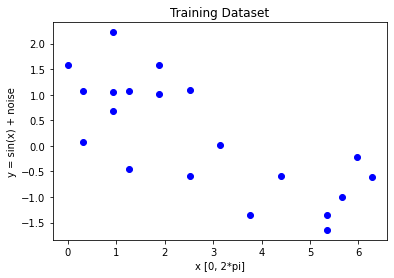

In [5]:
# Plot of Dataset
plt.plot(x_train,y_train,'bo');
plt.xlabel('x [0, 2*pi]');
plt.ylabel('y = sin(x) + noise');
plt.title('Training Dataset');
plt.show()

## Testing Dataset

In [6]:
# Variables
x_test = []
y_test = []

# Generation of Random Dataset. y = sin(x) 
for i in range(0,n):
    x=randrange(0,n+1)*2*math.pi/n;
    x_test.append(x);
    y_test.append(math.sin(x));

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.reshape(20,1)
y_test = y_test.reshape(20,1)

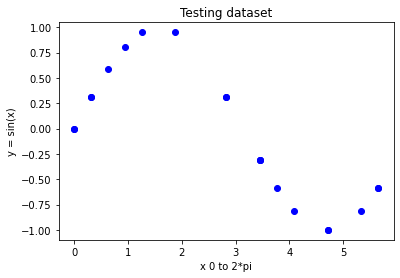

In [7]:
# Plot of Testing Dataset
plt.plot(x_test,y_test,'bo');
plt.xlabel('x 0 to 2*pi');
plt.ylabel('y = sin(x)');
plt.title('Testing dataset');
plt.show()

## Simple Linear Regression



In [8]:
# Fitting Simple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

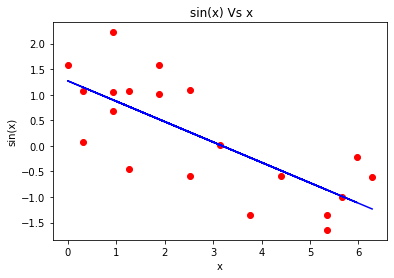

In [9]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title(' sin(x) Vs x')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

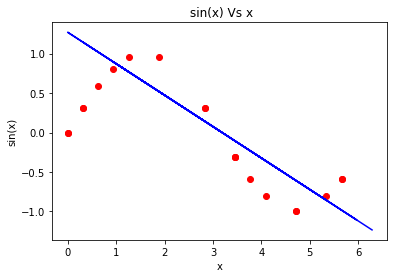

In [10]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title(' sin(x) Vs x')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [11]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.3082485789906846

## Multiple Linear Regression

### Training Data

In [12]:
# Variable Declarations
x1_train = []        # First Independent Variable
x2_train = []             # Second Independent Variable
ym_train = []              # Dependent Variable

# Generation of Random Dataset. y = sin(x1) + sin(x2) + noise
for i in range(0,n):
    x1=randrange(0,n+1)*2*math.pi/n
    x2=randrange(0,n+1)*2*math.pi/n
    x1_train.append(x1);
    x2_train.append(x2);
    ym_train.append((math.sin(x1) + math.sin(x2) + noise[i]));

x1_train = np.array(x1_train)
x2_train = np.array(x2_train)
ym_train = np.array(ym_train)

x1_train = x1_train.reshape(20,1)
x2_train = x2_train.reshape(20,1)
ym_train = ym_train.reshape(20,1)

xm_train = np.column_stack((x1_train, x2_train))

In [13]:
xm_train

array([[3.14159265, 1.88495559],
       [1.88495559, 4.71238898],
       [1.57079633, 0.31415927],
       [4.39822972, 5.34070751],
       [0.31415927, 5.02654825],
       [1.88495559, 5.02654825],
       [3.14159265, 0.        ],
       [2.51327412, 3.76991118],
       [2.51327412, 0.9424778 ],
       [4.71238898, 3.14159265],
       [6.28318531, 3.45575192],
       [2.51327412, 1.88495559],
       [2.82743339, 4.39822972],
       [2.19911486, 4.71238898],
       [1.57079633, 5.65486678],
       [5.02654825, 4.71238898],
       [3.76991118, 1.88495559],
       [5.65486678, 1.25663706],
       [2.19911486, 1.57079633],
       [1.57079633, 3.14159265]])

### Testing Dataset

In [14]:
# Variable Declarations
x1_test = []        # First Independent Variable
x2_test = []             # Second Independent Variable
ym_test = []              # Dependent Variable

# Generation of Random Dataset. y = sin(x1) + sin(x2) 
for i in range(0,n):
    x1=randrange(0,n+1)*2*math.pi/n
    x2=randrange(0,n+1)*2*math.pi/n
    x1_test.append(x1)
    x2_test.append(x2)
    ym_test.append((math.sin(x1) + math.sin(x2)))

xm_test = np.column_stack((x1_train, x2_train))

In [15]:
xm_test

array([[3.14159265, 1.88495559],
       [1.88495559, 4.71238898],
       [1.57079633, 0.31415927],
       [4.39822972, 5.34070751],
       [0.31415927, 5.02654825],
       [1.88495559, 5.02654825],
       [3.14159265, 0.        ],
       [2.51327412, 3.76991118],
       [2.51327412, 0.9424778 ],
       [4.71238898, 3.14159265],
       [6.28318531, 3.45575192],
       [2.51327412, 1.88495559],
       [2.82743339, 4.39822972],
       [2.19911486, 4.71238898],
       [1.57079633, 5.65486678],
       [5.02654825, 4.71238898],
       [3.76991118, 1.88495559],
       [5.65486678, 1.25663706],
       [2.19911486, 1.57079633],
       [1.57079633, 3.14159265]])

### Fitting Model

In [16]:
# Fitting Multiple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xm_train, ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Predicting the Test set results
ym_pred = regressor.predict(xm_test)

In [18]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(ym_test, ym_pred)

1.9308471493074908

## Polynomial Regression of Degree M

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# poly.fit_transform(xpoints)

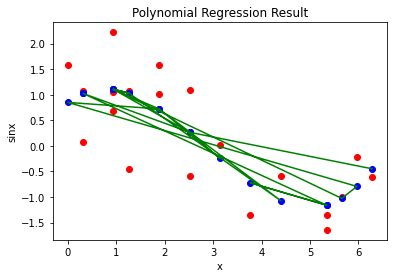

In [22]:
# Visualising the Polynomial Regression results 
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lin_reg_2.predict(poly_reg.fit_transform(x_train)), color='green')
plt.scatter(x_train, lin_reg_2.predict(poly_reg.fit_transform(x_train)), color='blue')
plt.title('Polynomial Regression Result')
plt.xlabel('x')
plt.ylabel('sinx')
plt.show()

In [24]:
mean_squared_error(y_train,lin_reg_2.predict(poly_reg.fit_transform(x_train)))

0.4319454702409978

## Ridge Regression

In [25]:
# Fitting Ridge Regression to the dataset 
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 

# Predicting the test set Results
y_pred_rr= rr.predict(x_test)


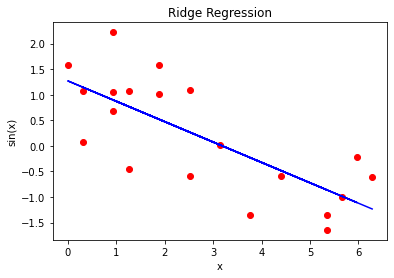

In [26]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, rr.predict(x_train), color = 'blue')
plt.title('Ridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

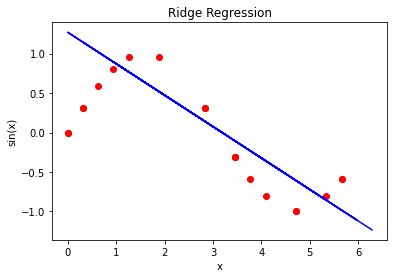

In [27]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, rr.predict(x_train), color = 'blue')
plt.title('Ridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [28]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_rr)

0.3081967998491887

## LASSO Regression

In [29]:
# Fitting LASSO Regression to the dataset 
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 

# Predicting the test set Results
y_pred_lasso= model_lasso.predict(x_test)


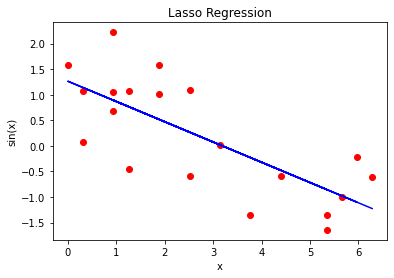

In [30]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model_lasso.predict(x_train), color = 'blue')
plt.title('Lasso Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

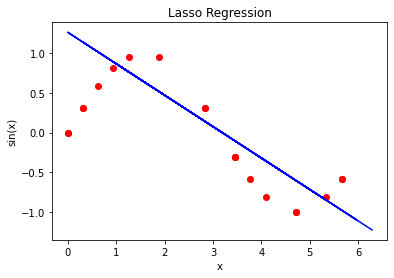

In [31]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, model_lasso.predict(x_train), color = 'blue')
plt.title('Lasso Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [32]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_lasso)

0.3056693388164232

## Elastic-Net Regression

In [33]:
# Fitting ElasticNet Regression to the dataset
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 

# Predicting the test set Results
y_pred_enet= model_enet.predict(x_test)

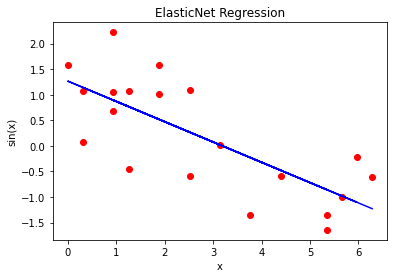

In [34]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model_enet.predict(x_train), color = 'blue')
plt.title('ElasticNet Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

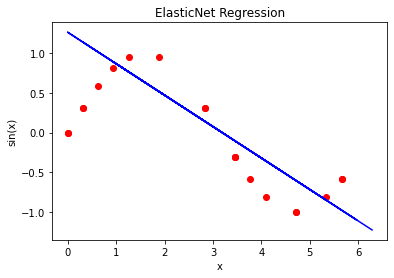

In [35]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, model_enet.predict(x_train), color = 'blue')
plt.title('ElasticNet Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [36]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_enet)

0.30644293108068393

## Bridge Regression